# Data Exploration

In this notebook, we explore the data columns, types, numerical value statistics, categorical values, missing values, target column classes, and correlations.

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [ ]:
data_path = os.path.join(os.getcwd(), '../data')

## Explore data

In [4]:
df = pd.read_csv(os.path.join(data_path, 'data_extracted', 'bank-additional', 'bank-additional-full.csv'), delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [28]:
print(open(os.path.join(data_path, 'data_extracted', 'bank-additional', 'bank-additional-names.txt'), 'r').read())

Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This 

#### Explore missing values

From the dataset description: missing values are marked as "unknown". Let's explore how many missing values each column has

In [66]:
df.replace('unknown', np.nan).isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

We will not exclude observations with missing values from the training data since new data for which predictions will be made can also have missing values. For simplicity, we can treat them as another category.

Column "default" has especially high number of missing values. 

#### Explore features and target data types and values

Explore numeric columns

In [16]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Explore categorical columns

In [18]:
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,40858,41108,39457,32591,40198,40198,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [26]:
obj_cols = list(df.select_dtypes(include='object').columns)

for col in obj_cols:
    print(df[col].value_counts())
    print('--------------------------------')


job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64
--------------------------------
marital
married     24928
single      11568
divorced     4612
Name: count, dtype: int64
--------------------------------
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64
--------------------------------
default
no     32588
yes        3
Name: count, dtype: int64
--------------------------------
housing
yes    21576
no     18622
Name: count, dtype: int64
--------------------------------
loan
no     33950
yes     6248
Name: count, dtype: int64
--------------------------------
contact
cellula

"\ndf['marital'].value_counts()\ndf['education'].value_counts()\ndf['default'].value_counts()\ndf['housing'].value_counts()\ndf['loan'].value_counts()\ndf['contact'].value_counts()\ndf['month'].value_counts()\ndf['day_of_week'].value_counts()\ndf['poutcome'].value_counts()\ndf['y'].value_counts()\n"

- Column "default" has very low variance with only 3 values indicating people with loans in default. The rest of values are either negative or unknown. The reasonability to keep this feature should be double checked using feature importance techniques.
- Column "day_of_week" could potentially be converted to a numerical column with range from 1 to 5 if we consider that the day of the week can affect how likely people are to answer a call, to continue a discussion, to buy new products, and if we consider that Monday is significantly different from Friday (beginning and end of the week)
- The effect of "month" column is questionable - how does a month influence the decision to buy a financial product? Double check with feature importance methods.

#### Are classes balanced?

In [8]:
df.y.value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

Classes are highly imbalanced towards class "no", i.e., towards clients who didn't buy a deposit product after a call. There is a risk that a machine learning model will tend to predict more clinets as not worthy to call to. This implies the following:
- Various under- and over-sampling methods can be applied. At the same time sampling methods can shift training data distribution compared to new data distribution and the model can perform poorly on new data.
- Accuracy shouldn't be used as a model evaluation metric. Since the request is to "lose as little business as possible", we should prioritize minimizing the number of False Negatives (clients falsely predicted as not wirthy to call to). We should, therefore, maximize the Recall while building and evaluating a model.
    - Besides, since the effects from False Positives and False Negatives are very different, the threshold shouldn't be 0.5 and should be lowered down.
- A model can still help to reduce the number of useless calls. At the same time making some useless calls should be acceptable compared to not making worthy calls.
    - An efficiency of a model can be compared to a baseline: making calls to all the clients.
        - profit without a model = -8$ * clients_all + 80$ * clients_converted
        - profit with a model = -8$ * (TP+FP) + 80$ * TP
        - additionally, opportunity costs = (80$-8$) * FN

#### Correlation between features and target

Let's convert all the columns to numeric values 

In [5]:
df_encoded = df
df_encoded['y'] = df_encoded['y'].replace('yes', 1)
df_encoded['y'] = df_encoded['y'].replace('no', 0)
df_encoded['y'] = df_encoded['y'].astype(int)

In [6]:
def ohe(df, obj_col):
    col_encoded = pd.get_dummies(df[[obj_col]], dtype = int)
    df_encoded = pd.concat([df, col_encoded], axis = 1)
    df_encoded = df_encoded.drop([obj_col], axis = 1)
    return(df_encoded)

In [7]:
obj_cols = list(df_encoded.select_dtypes(include='object').columns)
obj_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [8]:
for col in obj_cols:
    df_encoded = ohe(df_encoded, col)

In [9]:
df_encoded.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'mon

In [10]:
# resort columns for more intuitive correlation matrix
df_encoded = pd.concat([df_encoded['y'], df_encoded.drop(['y'], axis = 1)], axis = 1)
cor_matrix = df_encoded.corr()

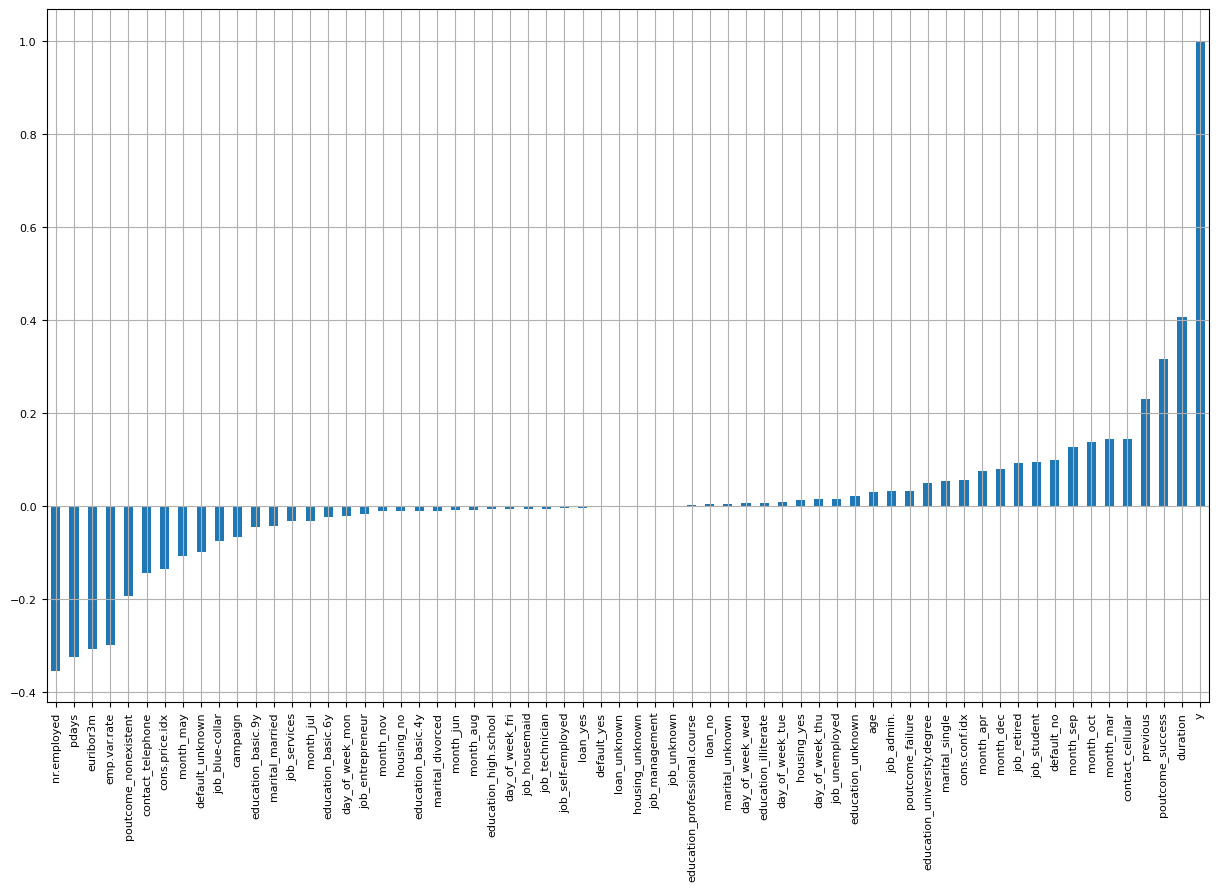

In [31]:
ax = cor_matrix.y.sort_values().plot.bar(y='y', fontsize=8, grid = True, figsize = (15,9))

<Axes: >

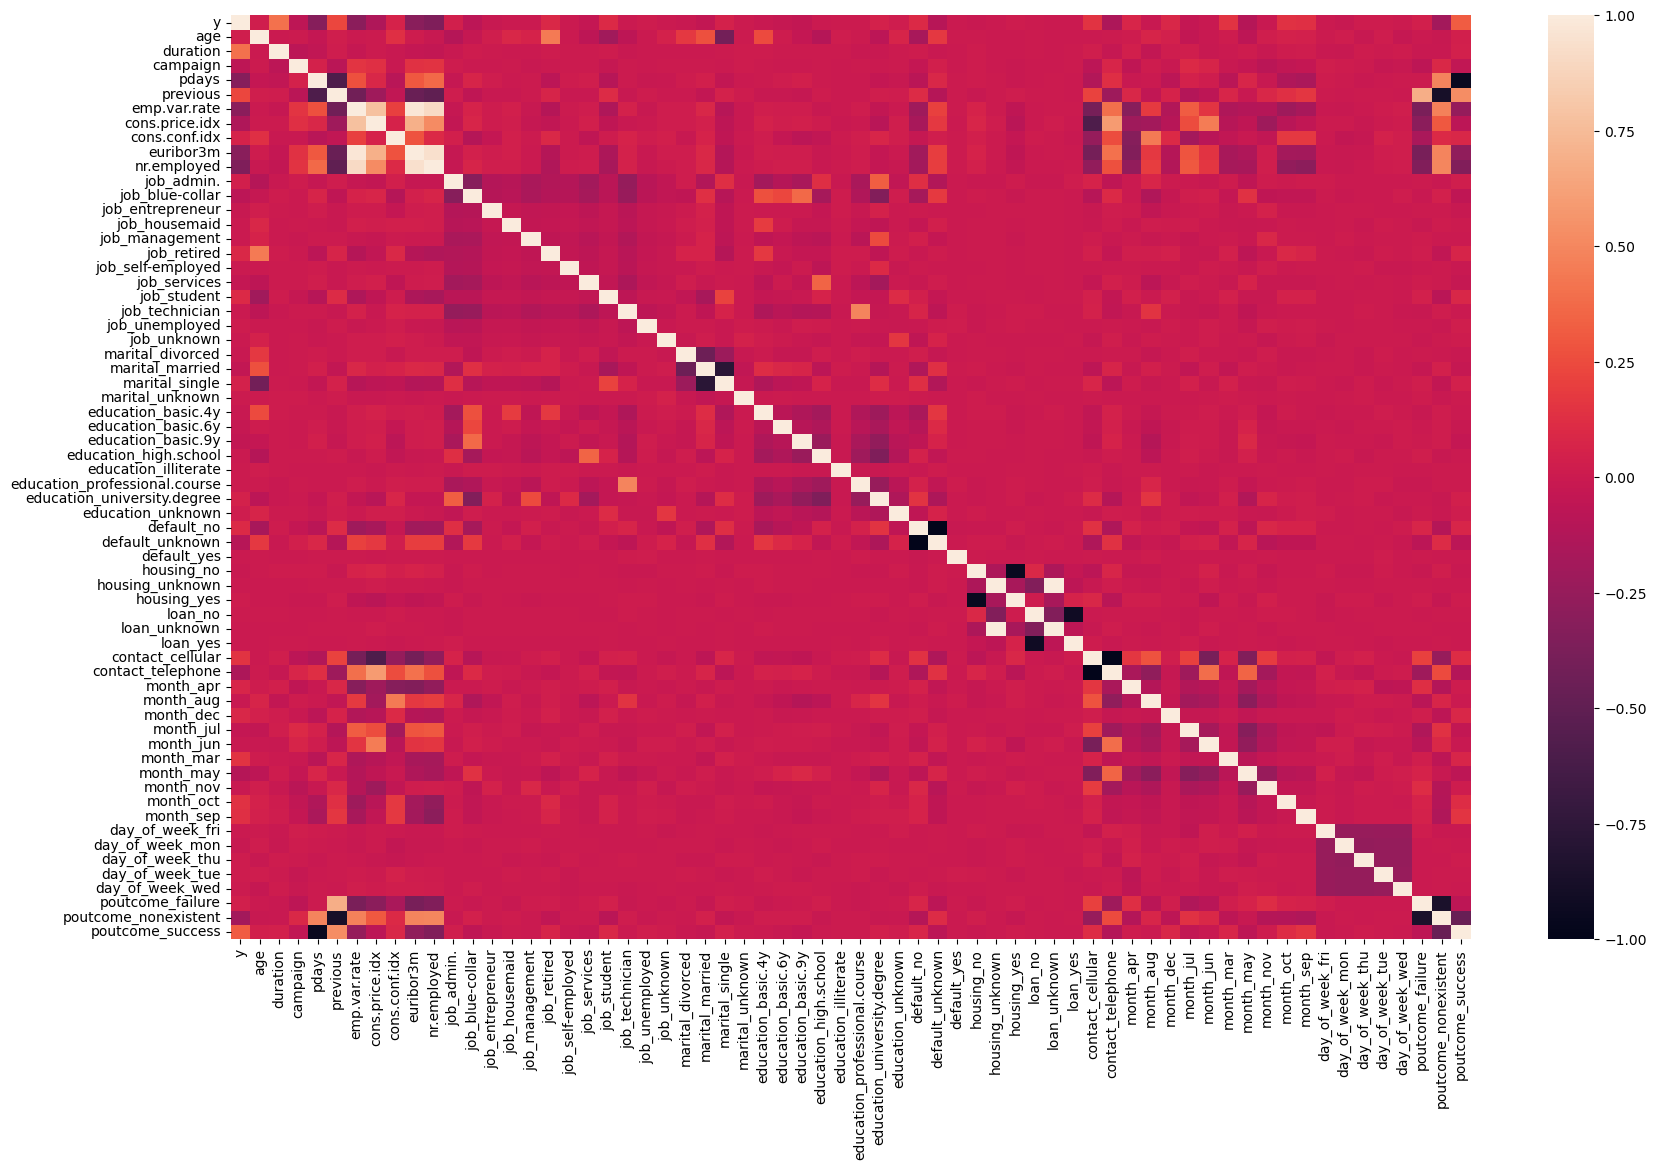

In [81]:
plt.figure(figsize=(20,12))
sns.heatmap(cor_matrix)

In [84]:
cor_matrix.y.sort_values()

nr.employed            -0.354678
pdays                  -0.324914
euribor3m              -0.307771
emp.var.rate           -0.298334
poutcome_nonexistent   -0.193507
                          ...   
contact_cellular        0.144773
previous                0.230181
poutcome_success        0.316269
duration                0.405274
y                       1.000000
Name: y, Length: 64, dtype: float64

From the correlation matrix, it is clear that the following features have the highest predictive power (|corr|>0.2):
- nr.employed, pdays, euribor3m, emp.var.rate - have negative correlation with the target
- previous, poutcome_success - have positive correlation with the target

Besides, feature "default_unknown", and various categories of feature "month" are relatovely highly correlated to the target compared to other features.

Despite high correlation, column "duration", as described in the dataset description, will not be available before the call and shouldn't be included.

The maintenance and preprocessing of the features less correlated with the target as well as including these features into model can decrease the efficiency of the whole pipeline and increase the risk of overfitting. However, these results of correlation analysis should be also confirmed by other methods, e.g., by the global feature importance methods after training the first model with all the features.

After the final model will be built, we will apply several gloabl and local feature importnace methods to communicate to the stakeholders (head of marketing) how the model is making preditions.

In [ ]:
# try automl to find worthy model
# fine tune only the best one
# and try xgboost because it tends to perform well often

# select one model and make it ready for deployment. e.g., as a REST service?

# explainable AI?